# Presentation 2 Calculation Notebook
## Spencer Cira - ChemE 599: Solar Energy Conversion & Solar Cells
-----------

In [137]:
# import all necessary packages
import numpy as np
import csv
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# define 'global' constants
jpereV = 1.602e-19
pi=np.pi #pi
h = 6.626e-34 #plancks constant
c = 3e8 #speed of light
k = 1.381e-23 #boltzmann constant
q = 1.602e-19 #charge on electron - coloumbs

------
# Shockley Quiesser Limit Calculation: Oxford PV Two-terminal tandem cell
### Calculations completed using the Wein approximation for blackbody emission

### General Constants and Data 
General Notes: Cell voltage = quasi fermi level splitting / q

In [209]:
# general temperature constants
T_a = 298 #ambient temp for outgoing rad recomb. - k
T_sun = 5760 #surface temp of sun - k

# download AMG1.5 cdf spectra into pandas file
AMG1_5spectra_cdf = pd.read_excel('AMG15_photonflux_cdf.xlsx', sheet_name='Data')
#AMG1_5spectra_cdf.head()

# load columns into specific datasets
Energy_eV_AM15 = AMG1_5spectra_cdf['Energy[eV]']
Wavelength_nm_AM15 = AMG1_5spectra_cdf['Wavelength[nm]']
CDF_photonflux_AM15 = AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]']
spectralirradiance_AM15 = AMG1_5spectra_cdf['Spectral irradiance[W/m2nm-1]']

## Top Cell Calculations - Perovskite [Eg = 1.65 eV] 
Index for 1.65 eV is 475 (for use with AM1.5 CDF)
### Photons / current in from AM1.5

In [210]:
#photons / current in
photons_in_top = AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]'].values[475] #extract value at 1.65 eV
current_in_top_cm = q * photons_in_top  # turn photons into A/cm^2
current_density_top_in = current_in_top_cm * (100*100)  #current density A/m^2
print(str(current_density_top_in) + " is the photocurrent into the top cell [A/m2] from the sun")

243.50400000000002 is the photocurrent into the top cell [A/m2] from the sun


### Wein Approximation for Rad. Recomb. to get JV Characteristic


In [275]:
Eg_top = 1.65 #eV
V_vector = np.linspace(0.01, 4, 1000) #eV 

radiative_current_out_top = ((q*2*pi*k*T_a)/(h**3*c**2))*((Eg_top*jpereV)**2 + 2*Eg_top*jpereV*k*T_a + 2*k**2*T_a**2) * np.exp(-((Eg_top - V_vector)*jpereV)/(k*T_a))

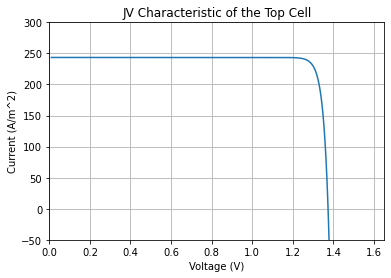

In [321]:
#plotting the voltage vs current relationship

j_top = radiative_current_out_top - current_density_top_in

plt.plot(V_vector, -j_top)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A/m^2)')
plt.title('JV Characteristic of the Top Cell')
plt.xlim([0,1.65])
plt.ylim([-50, 300])
plt.grid()

303.8339507156597 is the max power out of the top cell [W/m2].


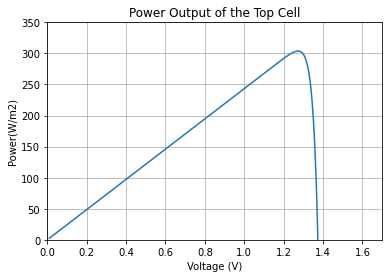

In [322]:
#plotting power vs voltage

power_top = - j_top * V_vector
plt.plot(V_vector, power_top)
plt.xlabel('Voltage (V)')
plt.ylabel('Power(W/m2)')
plt.title('Power Output of the Top Cell')
plt.xlim([0,1.7])
plt.ylim([0, 350])
plt.grid()

print(str(max(power_top)) + " is the max power out of the top cell [W/m2].")

In [ ]:
Eg_top = 1.65 #eV - bandgap of top perovskite absorber  ##**EDIT ME**##
#define voltage vector
#V_vector = np.linspace(0, 1.65, 1000) #eV 

#BB_photon_flux_out = (((2*pi*(Eg_top*jpereV)**2)/(h**3*c**2))* \
        (1/(np.exp((Eg_top*jpereV - (q*V_vector))/(k * T_a))-1))) * jpereV # in units of photons/(s*m2*eV)



### Photons out via radiative Recombination (not using wein's law) - NOT FINISHED
Here, the generalized black body emission spectra integrated needs to equal the generalized planck law integration - this allows us to find the quasi-fermi level splitting that this cell will operate at

In [278]:
# photons out via radiative Recombination

#Eg_top = 1.65 #eV - bandgap of top perovskite absorber

#define voltage vector
#V_vector = np.linspace(1.66, 5, 1000) #eV 

# define photon energy vector to use for calculations AND blackbody flux spectra (for rad. recomb.)

#BB_photon_flux_out = (((2*pi*(Eg_top*jpereV)**2)/(h**3*c**2))* \
       # (1/(np.exp((Eg_top*jpereV - (q*V_vector))/(k * T_a))-1))) * jpereV # in units of photons/(s*m2*eV)

#current_flux_out_trapz = np.trapz(BB_photon_flux_out, V_vector)

#print(str(current_flux_out_trapz))

# dont think the below is useful / makes sense
# define current out of cell
#radiative_current_out = BB_photon_flux_out * q #A/m2



### Plot current vs. voltage characteristic - NOT FINISHED

In [279]:
#**EDIT ME**
#j_top = radiative_current_out - current_density_top_in

#plt.plot(V_vector, j_top)
#plt.xlabel('Voltage (V)')

#plt.ylabel('Current (A/m^2)')
#plt.xlim([0,1.7])
#plt.ylim([0,4])

## Bottom Cell Calculations - Silicon [Eg = 1.12 eV]
Index for 1.12 eV is 829 (for us with CDF AM1.5)

### Photons / current into cell

In [247]:
#photons / current in
photons_in_bottom = AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]'].values[829] - AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]'].values[475] 
current_in_bottom_cm = q * photons_in_bottom  # turn photons into A/cm^2
current_density_bottom_in = current_in_bottom_cm * (100*100)  #current density A/m^2
print(str(current_density_bottom_in) + " is the photocurrent into the bottom cell [A/m2] from the sun")

193.842 is the photocurrent into the bottom cell [A/m2] from the sun


### Wein approximation for radiative recombination to get JV curve
**May need to check the validity of my outgoing radiation from the bottom cell!** -- FIX ME

In [256]:
Eg_bottom = 1.12 #eV
Eg_top = 1.65 #eV
V_vector = np.linspace(0.01, 4, 1000) #eV 

#radiative current out of the bottom cell = int(Eg_bott to inf[V]) - int(Eg_top to inf[V])
radiative_current_out_bottom = \
    ((q*2*pi*k*T_a)/(h**3*c**2))*((Eg_bottom*jpereV)**2 + 2*Eg_bottom*jpereV*k*T_a + \
    2*k**2*T_a**2) * np.exp(-((Eg_bottom - V_vector)*jpereV)/(k*T_a)) - \
    ((q*2*pi*k*T_a)/(h**3*c**2))*((Eg_top*jpereV)**2 + 2*Eg_top*jpereV*k*T_a + 2*k**2*T_a**2) \
     * np.exp(-((Eg_top - V_vector)*jpereV)/(k*T_a))

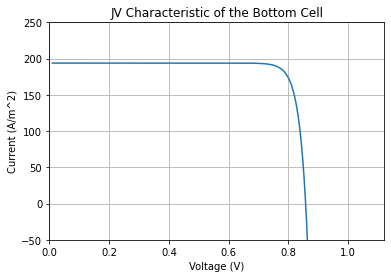

In [325]:
# plotting the current vs voltage relationship

j_bottom = radiative_current_out_bottom - current_density_bottom_in

plt.plot(V_vector, -j_bottom)
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A/m^2)')
plt.title('JV Characteristic of the Bottom Cell')
plt.xlim([0,1.12])
plt.ylim([-50, 250])
plt.grid()

144.2898979079551 is the max power out of the top cell [W/m2].
[190]
Voltage and Current at max power point are: 0.768858858858859 volts, 187.6676014660354 A/m^2


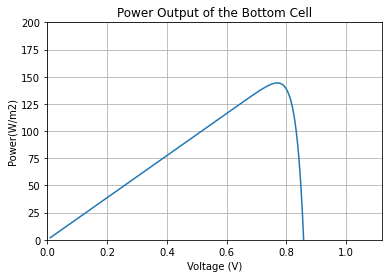

In [334]:
#plotting power vs voltage

power_bottom = - j_bottom * V_vector
plt.plot(V_vector, power_bottom)
plt.xlabel('Voltage (V)')
plt.ylabel('Power(W/m2)')
plt.title('Power Output of the Bottom Cell')
plt.xlim([0,1.12])
plt.ylim([0, 200])
plt.grid()

print(str(max(power_bottom)) + " is the max power out of the top cell [W/m2].")
#print("This occurs at a voltage of " + )

#find index of the max value
PP_max = max(power_bottom)
print([index for index, item in enumerate(power_bottom) if item == PP_max])

# get current and voltage of the cell at PP_max
j_mpp = j_bottom[190]
v_mpp = V_vector[190]
print("Voltage and Current at max power point are: " + str(v_mpp) + " volts, " + str(-j_mpp) + " A/m^2")


# Analyzing the whole Tandem cell

Cell current - The current of the cell is determined by the lower current of the two cells
Thus, since the bottom silicon cell operates at a maximum power point current of 187.7 A/m^2 this will be the
current for the entire cell

Voltage will be the sum of the two voltages that occur when each cell is at 187.7 A/m^2 on the JV curve. For the silicon bottom cell, the voltage is 0.769 volts. For the perovskite top cell, the voltage is 1.33 volts.

### Shockley Quiesser Efficiency Final Calculation

In [304]:
# so the max efficiency of the perovskite on silicon tandem is..
Top_V_operating = 1.33
Bottom_V_operating = 0.769
Net_tandem_current = 187.7

Max_power_tandem = Net_tandem_current * (Bottom_V_operating + Top_V_operating)
net_efficiency = Max_power_tandem / 1000 * 100 # power / 1000 W/m2 * 100%

print("The Detailed Balance (SQ) Limit for the Perovskite on Silicon Two-Terminal Tandem Cell is: " +str(net_efficiency) + " %")

The Detailed Balance (SQ) Limit for the Perovskite on Silicon Two-Terminal Tandem Cell is: 39.39823 %


------------
## Adjusted Detailed Balance/SQ Limit Using Reflectance and Absorptance Calculations from the Transfer Matrix Method

Method: With the reflectance and absorptance spectra that was calculated with the transfer matrix method, I can calculate the lost current due to absorptance and reflectance by layers other than the absorber. Using the absorptance and reflectance spectra, I can multiply (dot product wise) these spectra by the AMG1.5 spectra, and then integrate this resultant spectra to get the lost current. These losses directly affect Jsc. So, the adjusted JV curve to determine max efficiency ends up being the following: **J(V) = J_rad_recomb(V) - (J_shortcircuit - J_reflectanceloss - J_absorptanceloss)**

### Accurate way for this calculation will be done below -- FIX ME - not done yet ---

In [ ]:
# please read the above for general intuitional thinking regarding this calculation
# I'll start by reanalyzing the cell as a 4 terminal cell then doing the necessary
# calculations for getting the two terminal

# reflectance_data =
# r_times_am1.5g = AMG1.5 .* reflectance_data
# trapz the above to get the 'net reflectance current'



### Simplified Version Shown here where an average reflectance of the desired wavelengths is assumed
#### Top Cell

243.50400000000002 is the photocurrent into the top cell [A/m2] from the sun
The current lost due to reflectance:  36.525600000000004  A/m^2
The current lost due to absorptance:  24.350400000000004  A/m^2
226.54616184067382 is the max power out of the top cell [W/m2].
The power lost due to reflectance and absorptance losses is:  77.2538381593262 W/m2


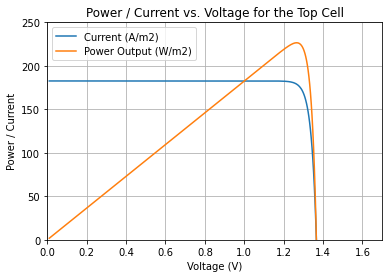

In [373]:
##########################################################################################
##########################################################################################

# reflectance and absorptance assumptions input here
total_r = 0.15  #EDIT ME but not anything else
total_a = 0.1   #EDIT ME but not anything else

##########################################################################################
##########################################################################################

#photons / current in
photons_in_top = AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]'].values[475] #extract value at 1.65 eV
current_in_top_cm = q * photons_in_top  # turn photons into A/cm^2
current_density_top_in = current_in_top_cm * (100*100)  #current density A/m^2
print(str(current_density_top_in) + " is the photocurrent into the top cell [A/m2] from the sun")

Eg_top = 1.65 #eV
V_vector = np.linspace(0.01, 4, 1000) #eV 

radiative_current_out_top = ((q*2*pi*k*T_a)/(h**3*c**2))*((Eg_top*jpereV)**2 + 2*Eg_top*jpereV*k*T_a + 2*k**2*T_a**2) * np.exp(-((Eg_top - V_vector)*jpereV)/(k*T_a))
refl_current = total_r * current_density_top_in
abs_current = total_a * current_density_top_in

#print the reflectance and absorptance current
print("The current lost due to reflectance: ", refl_current, " A/m^2")
print("The current lost due to absorptance: ", abs_current, " A/m^2")

#plotting the voltage vs current relationshipv - including the loss of current
j_top = radiative_current_out_top - (current_density_top_in - refl_current - abs_current) 

plt.plot(V_vector, -j_top, label="Current (A/m2)")
plt.xlabel('Voltage (V)')
plt.ylabel('Power / Current')
plt.title('Power / Current vs. Voltage for the Top Cell')
plt.xlim([0,1.7])
plt.ylim([0, 250])
plt.grid()

# plotting power vs voltage
power_top = - j_top * V_vector
plt.plot(V_vector, power_top, label="Power Output (W/m2)")
plt.legend(loc='upper left')

print(str(max(power_top)) + " is the max power out of the top cell [W/m2].")
print("The power lost due to reflectance and absorptance losses is: ", 303.8 -max(power_top), "W/m2")

#### Bottom Cell

193.842 is the photocurrent into the bottom cell [A/m2] from the sun
The current lost due to reflectance:  29.0763  A/m^2
The current lost due to absorptance:  19.384200000000003  A/m^2
107.17414378196642 is the max power out of the top cell [W/m2].
[188]
Voltage and Current at max power point are: 0.768858858858859 volts, 139.2071014660354 A/m^2
The power lost due to reflectance and absorptance losses is:  37.12585621803359 W/m2


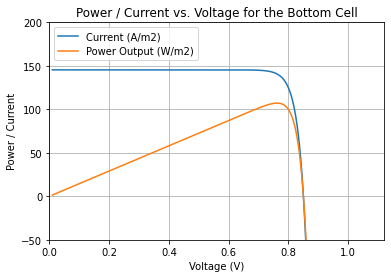

In [365]:
##########################################################################################
##########################################################################################

# reflectance and absorptance assumptions input here
total_r = 0.15  #EDIT ME but not anything else
total_a = 0.1   #EDIT ME but not anything else

##########################################################################################
##########################################################################################

#photons / current in
photons_in_bottom = AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]'].values[829] - AMG1_5spectra_cdf['Cumulative photon flux[1/cm2s]'].values[475] 
current_in_bottom_cm = q * photons_in_bottom  # turn photons into A/cm^2
current_density_bottom_in = current_in_bottom_cm * (100*100)  #current density A/m^2
print(str(current_density_bottom_in) + " is the photocurrent into the bottom cell [A/m2] from the sun")

Eg_bottom = 1.12 #eV
Eg_top = 1.65 #eV
V_vector = np.linspace(0.01, 4, 1000) #eV 

refl_current = total_r * current_density_bottom_in
abs_current = total_a * current_density_bottom_in 

#print the reflectance and absorptance current
print("The current lost due to reflectance: ", refl_current, " A/m^2")
print("The current lost due to absorptance: ", abs_current, " A/m^2")

#radiative current out of the bottom cell = int(Eg_bott to inf[V]) - int(Eg_top to inf[V])
radiative_current_out_bottom = \
    ((q*2*pi*k*T_a)/(h**3*c**2))*((Eg_bottom*jpereV)**2 + 2*Eg_bottom*jpereV*k*T_a + \
    2*k**2*T_a**2) * np.exp(-((Eg_bottom - V_vector)*jpereV)/(k*T_a)) - \
    ((q*2*pi*k*T_a)/(h**3*c**2))*((Eg_top*jpereV)**2 + 2*Eg_top*jpereV*k*T_a + 2*k**2*T_a**2) \
     * np.exp(-((Eg_top - V_vector)*jpereV)/(k*T_a))

# plotting the current vs voltage relationship

j_bottom = radiative_current_out_bottom - (current_density_bottom_in - refl_current - abs_current)

plt.plot(V_vector, -j_bottom, label="Current (A/m2)")
plt.xlabel('Voltage (V)')
plt.ylabel('Power / Current')
plt.title('Power / Current vs. Voltage for the Bottom Cell')
plt.xlim([0,1.12])
plt.ylim([-50, 200])

                                           
#plotting power vs voltage

power_bottom = - j_bottom * V_vector
plt.plot(V_vector, power_bottom, label="Power Output (W/m2)")
plt.legend(loc='upper left')
plt.grid()

print(str(max(power_bottom)) + " is the max power out of the top cell [W/m2].")
#print("This occurs at a voltage of " + )

#find index of the max value
PP_max = max(power_bottom)
print([index for index, item in enumerate(power_bottom) if item == PP_max])

# get current and voltage of the cell at PP_max
j_mpp = j_bottom[190]
v_mpp = V_vector[190]
print("Voltage and Current at max power point are: " + str(v_mpp) + " volts, " + str(-j_mpp) + " A/m^2")
print("The power lost due to reflectance and absorptance losses is: ", 144.3 - max(power_bottom), "W/m2")

#### Analyzing both the cells as a two-terminal tandem

In [369]:
cellwloss_current_operating = 139.2 
topcell_operatingV_wloss = 1.33
bottomcell_operatingV_wloss = 0.77


net_efficiency_cellwloss = cellwloss_current_operating * (topcell_operatingV_wloss + bottomcell_operatingV_wloss) \
                            * (100/1000)
print("The maximum efficiency of a cell with optical losses defined in the code above is ", net_efficiency_cellwloss, "%")

The maximum efficiency of a cell with optical losses defined in the code above is  29.232 %


--------
### Current vs. voltage characteristic general notes to guide the above section
The equation below is that for calculating the current vs. voltage characteristic for the SQ/Detailed balance limit. The choice of N_in (photon flux in) is abitrary but is chosen here to be the AM1.5 spectra. The cumulative density function is imported and used here which is an integration from infinity to the desired energy.

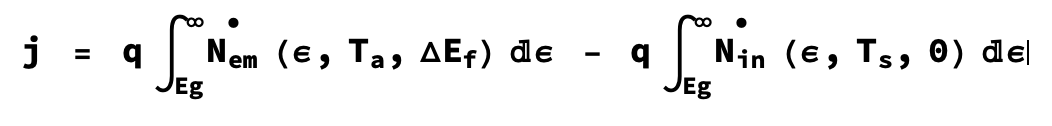

The below equation is used for the blackbody radiative (planck's rad. law) recombination emission by the cell

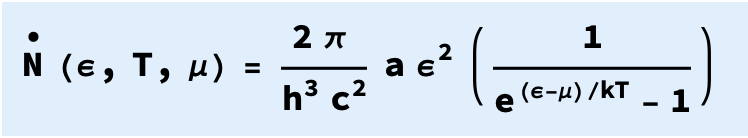

Wein's Approximation for blackbody radiation (radiative recombination) is integrable and is a close approximation when energies of interest are greater than 4 times kT - this is always true thus we have used this substitution in our calculation <br>

The approximation is shown below:

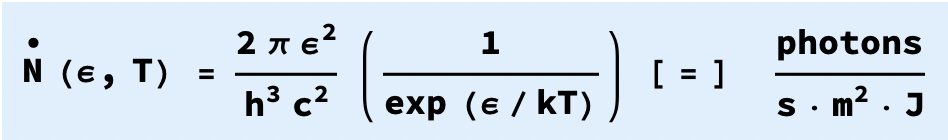

And the following is the entegration from Eg to infinity for the Wein approximation -- the fact that this funciton is integrable makes it very handy for this calculation

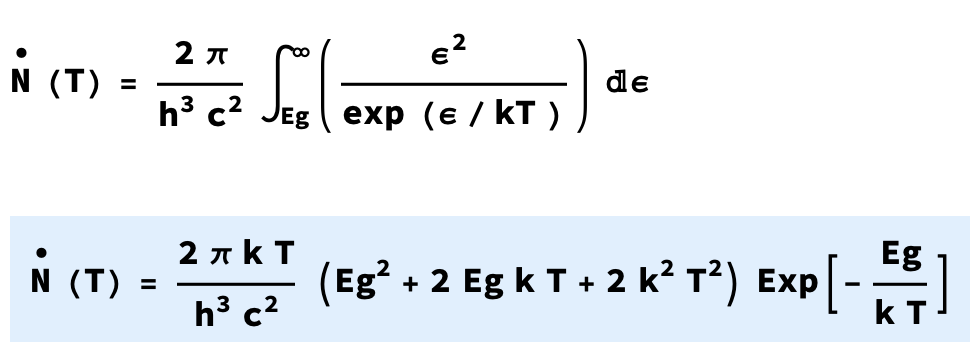

In [ ]:
## some extra notes below

# Two different semiconductors - two total terms to calculate the total radiative recombination limit
# General planck law takes into account the absorptivity - replace emissivity with absorptivity



#write a code block to calculate the whole JV curve for the cell (should be two integrals equal to each other)

--------
--------------
# Layer-by-layer absorptivity

Absorption Coefficient is the following:

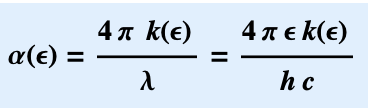

Absorptivity of each layer is the following:

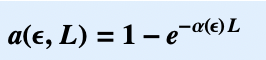

#### Cell Cross Section

### ** Put Cross Section of Oxford PV Cell here for reference**

In [403]:
# the following function will calculate and plot the spectral absorptivity based on given k values, photon energy values 
# and thickeness of film

def spectral_absorptivity(n_k_values, length, mat_name):
    #imput1: pandas dataframe of photon energy in eV, n values, k values
    #input 2: layer thickness
    #input 3: material name as a string
    
    #define constants 
    jpereV = 1.602e-19
    pi = np.pi #pi
    h = 6.626e-34 #plancks constant
    c = 3e8 #speed of light
    
    #extract appropriate info
    mat_eV = n_k_values['Photon energy, eV']
    mat_n = n_k_values['n']
    mat_k = n_k_values['k']
    
    #calculate spectral absorptivity
    alpha = (4*pi*mat_eV*mat_k*jpereV)/(h*c) #abs coefficient (spectrally)
    a = 1-np.exp(-alpha*length) #absorptivity (spectrally)
    
    #plot spectral absorptivity w/ appropriate axes
    plt.plot(mat_eV, a)
    plt.xlabel('Photon Energy, eV')
    plt.ylabel('Absorptivity of ' + mat_name)
    plt.title('Spectral Absorptivity for ' + mat_name + ' Layer')
    plt.ylim([0,1])
    #plt.xlim([0,5])


#### ITO Top Layer

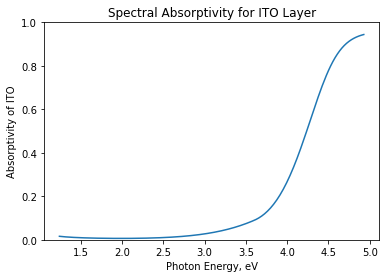

In [404]:
# top layer: ITO
ito_l = 100e-9
ito_nk = pd.read_csv('RI/ITORI.csv')

spectral_absorptivity(ito_nk, ito_l, 'ITO')

##### Spiro MeOTAD Hole Transport Layer

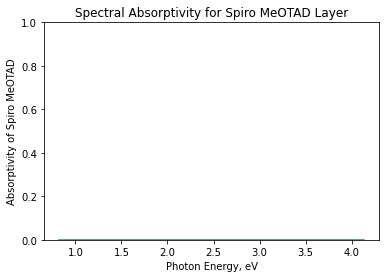

In [412]:
#Spiro MeOTAD - HLT 

spiro_nk = pd.read_csv('RI/SpiroRI.csv')
spiro_l = 50e-9
spectral_absorptivity(spiro_nk, spiro_l, 'Spiro MeOTAD')

#### Perovskite Top Cell Absorber

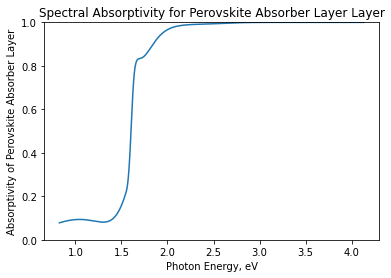

In [406]:
# Perovskite - absorber

perov_l = 500e-9 #thickness of perovskite layer **CHANGE ME**
perov_nk = pd.read_csv('RI/MAPIRI.csv')
spectral_absorptivity(perov_nk, perov_l, 'Perovskite Absorber Layer')

#### PNDI(2OD)2T Electron Transport Layer

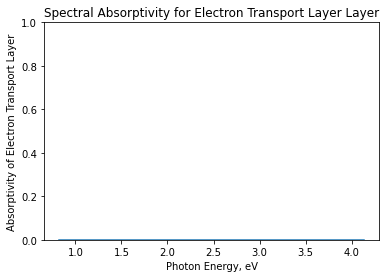

In [407]:
# PNDI(2OD)2T - ETL ##change me to something that is easier to analyze

PND_nk = pd.read_csv('RI/PNDRI.csv')
PND_l = 40e-9
spectral_absorptivity(PND_nk, PND_l, 'Electron Transport Layer')

#### ITO Recombination Layer

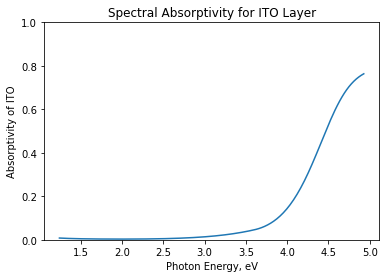

In [408]:
# ITO - Recombination Layer
ito_l_re = 50e-9
ito_nk = pd.read_csv('RI/ITORI.csv')

spectral_absorptivity(ito_nk, ito_l_re, 'ITO')


#### Amorphous Silicon

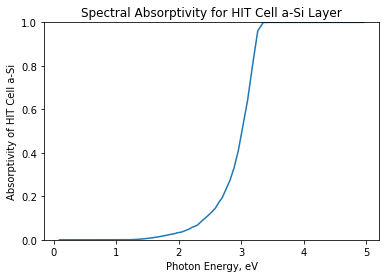

In [409]:
# Silicon - HIT cell (treat as one larger layer of Silicon)

aSi_l = 100e-9
aSi_nk = pd.read_csv('RI/cSiRI.csv')

spectral_absorptivity(aSi_nk, aSi_l, 'HIT Cell a-Si')

#### Crystalline Silicon Layer

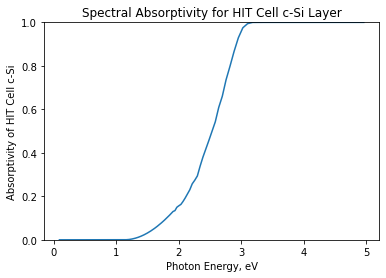

In [410]:
# Silicon - HIT cell (treat as one larger layer of Silicon)

cSi_l = 500e-9
cSi_nk = pd.read_csv('RI/cSiRI.csv')

spectral_absorptivity(cSi_nk, cSi_l, 'HIT Cell c-Si')

## Reflectivity Considerations

How to reduce reflectivity in the cell: <br>
(1) front surface anti-reflection layer/coating [generally is something like LiF2 or MgF2] <br>
(2) Surface texturing layer-by-layer <br>
(3) Material choice <br>

In [411]:
# the following function calculates and plots the spectral reflectivity for a material given the refractive index
# of the material and the material before (the concern for reflection is all at the interface)


'''

def spectral_reflectivity(n_k_values, length, mat_name):
    #imput1: pandas dataframe of photon energy in eV, n values, k values
    #input 2: layer thickness
    #input 3: material name as a string
    
    #define constants 
    jpereV = 1.602e-19
    pi = np.pi #pi
    h = 6.626e-34 #plancks constant
    c = 3e8 #speed of light
    
    #extract appropriate info
    mat_eV = n_k_values['Photon energy, eV']
    mat_n = n_k_values['n']
    mat_k = n_k_values['k']
    
    #calculate spectral reflectivity
    #reflectsomething = 
    #reflectivity = 
    
    #plot spectral absorptivity w/ appropriate axes
    plt.plot(mat_eV, reflectivity)
    plt.xlabel('Photon Energy, eV')
    plt.ylabel('Reflectivity of ' + mat_name)
    plt.title('Spectral Reflectivity for ' + mat_name + ' Layer')
    
'''


"\n\ndef spectral_reflectivity(n_k_values, length, mat_name):\n    #imput1: pandas dataframe of photon energy in eV, n values, k values\n    #input 2: layer thickness\n    #input 3: material name as a string\n    \n    #define constants \n    jpereV = 1.602e-19\n    pi = np.pi #pi\n    h = 6.626e-34 #plancks constant\n    c = 3e8 #speed of light\n    \n    #extract appropriate info\n    mat_eV = n_k_values['Photon energy, eV']\n    mat_n = n_k_values['n']\n    mat_k = n_k_values['k']\n    \n    #calculate spectral reflectivity\n    #reflectsomething = \n    #reflectivity = \n    \n    #plot spectral absorptivity w/ appropriate axes\n    plt.plot(mat_eV, reflectivity)\n    plt.xlabel('Photon Energy, eV')\n    plt.ylabel('Reflectivity of ' + mat_name)\n    plt.title('Spectral Reflectivity for ' + mat_name + ' Layer')\n    \n"

In [ ]:
#calculate spectral reflectivity, absorptivity, and transmissivity for MgF2 (hypothetical anti-reflection coating)


#spectral_absorptivity()
#spectral_reflectivity()
#spectral_transmissivity = 1 - spectral_absorptivity - spectral_reflectivity



